In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.shape

(907, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
data.drop(['gppd_idnr','url'], axis=1, inplace= True)

In [7]:
data['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

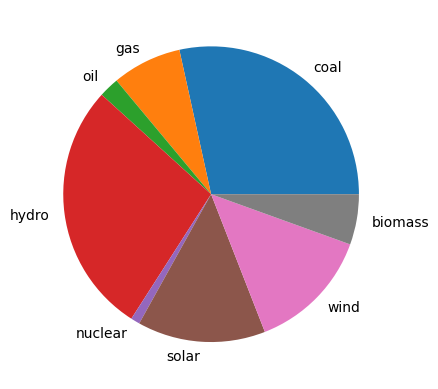

In [8]:
primary_fuel=[258,69,20,251,9,127,123,50]
items=['coal','gas','oil','hydro','nuclear','solar','wind','biomass']
plt.pie(x= primary_fuel,labels= items)
plt.show()

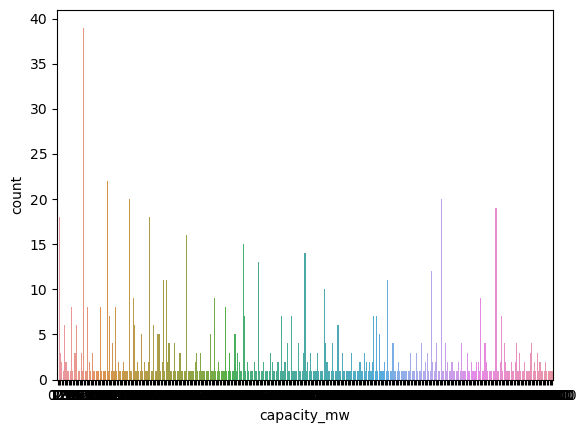

In [9]:
sns.countplot(x='capacity_mw',data=data)
plt.show()

In [10]:
obj= (data.dtypes== 'object')
object_cols= list(obj[obj].index)
index=1

In [11]:
lab_enc= LabelEncoder()

In [12]:
obj= (data.dtypes=='object')
for col in list(obj[obj].index):
    data[col]= lab_enc.fit_transform(data[col])

In [13]:
data.dtypes

country                       int32
country_long                  int32
name                          int32
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                  int32
other_fuel1                   int32
other_fuel2                   int32
other_fuel3                 float64
commissioning_year          float64
owner                         int32
source                        int32
geolocation_source            int32
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source        int32
estimated_generation_gwh    float64
dtype: object

In [14]:
data.isna().sum()

country                       0
country_long                  0
name                          0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year          380
owner                         0
source                        0
geolocation_source            0
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

In [15]:
for col in data.columns:
    data[col]= data[col].fillna(data[col].mean())
data.isna().sum()

country                       0
country_long                  0
name                          0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

In [16]:
data1= data.dropna(axis=1)
data1.isna().sum()

country                   0
country_long              0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [17]:
X= data1.drop(columns=['primary_fuel','capacity_mw'])
Y_fuel= data1['primary_fuel']
Y_capacity= data1['capacity_mw']

In [18]:
X_train, X_test, Y_fuel_train, Y_fuel_test, Y_capacity_train, Y_capacity_test= train_test_split(X, Y_fuel, Y_capacity, test_size=0.2,random_state= 40)

In [19]:
rfc= RandomForestClassifier()
ln= LinearRegression()

rfc.fit(X_train, Y_fuel_train)
ln.fit(X_train, Y_capacity_train)

Y_fuel_pred= rfc.predict(X_test)
Y_capacity_pred= ln.predict(X_test)

In [20]:
accuracy= accuracy_score(Y_fuel_test,Y_fuel_pred)
mse= mean_squared_error(Y_capacity_test,Y_capacity_pred)

In [21]:
print(f"Primary Fuel Accuracy Prediction= {100*accuracy}")
print(f"Capacity MW Prediction= {np.sqrt(mse)*100: .2f}%")

Primary Fuel Accuracy Prediction= 88.46153846153845
Capacity MW Prediction=  22165.09%


Above is the accuracy prediction for primary_fuel and capacity_mw using Random Forest Classifier and Linear Regression.